## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D , Dropout
from keras.datasets import mnist

## Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
# 1. The number of training data, height, width, number of channels
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Add Noise to the Image

In [5]:
# add noise
# oc=0.0: The mean (μ) of the distribution. scale=1.0: The standard deviation (σ) of the distribution. size=x_train.shape: The shape of the output array. This ensures that the generated noise array has the same shape as x_train
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
# clip the values in the range of 0-1
# This code is to make sure all the datas is between 0 and 1 if the data is greater than 1 it will be clip to 1. For datas which is less than 0 will be clip to 0.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Exploratory Data Analysis

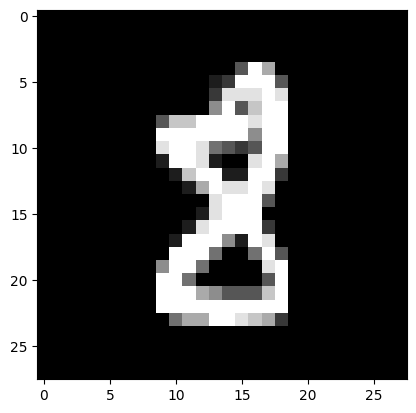

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
# Ensure the image is displayed using a grayscale color map
plt.gray()

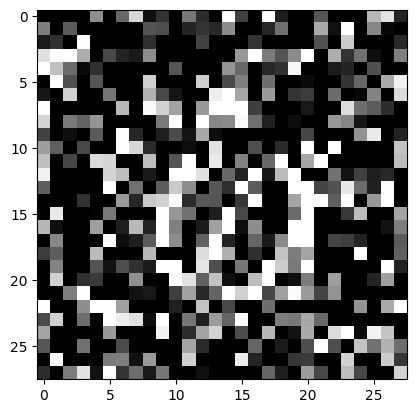

In [8]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

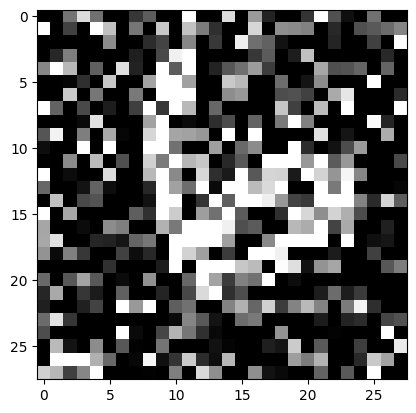

In [9]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

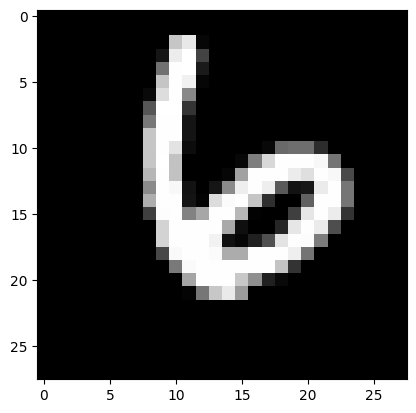

In [10]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [11]:
model = Sequential([
                    # encoder network
                    # 32: Number of filters (output depth). 3: Filter size (3x3 kernel). padding='same': Padding strategy that ensures the output has the same width and height as the input.
                    # input_shape=(28, 28, 1): Shape of the input image (28x28 pixels, 1 channel for grayscale).
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    Dropout(0.25),
                    # 2: Pool size (2x2).
                    MaxPooling2D(2, padding='same'),
                    # Dropout(0.5),
                    # 16: Number of filters (output depth).
                    # 3: Filter size (3x3 kernel).
                    Conv2D(16, 3, activation='relu', padding='same'),
                    # Dropout(0.5),
                    MaxPooling2D(2, padding='same'),

                    # decoder network
                    # The decoder network is responsible for reconstructing the input image from the compressed representation.

                    Conv2D(16, 3, activation='relu', padding='same'),
                    Dropout(0.25),
                    # 2: Upsampling factor (scales the width and height of the input by a factor of 2).
                    UpSampling2D(2),
                    # Dropout(0.5),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    # Dropout(0.5),
                    UpSampling2D(2),
                    # output layer
                    # The sigmoid activation function is used because it bounds the output values to a range between 0 and 1, making it suitable for these tasks.
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

# Adam is very well known optimizer that is why I choose it for this model.
# We can chaning it to see which one work better
model.compile(optimizer='adam', loss='binary_crossentropy')
# Show the summary for the model so it is easy to understand
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2

In [ ]:
# train the model
# The batch size determines the number of samples that will be propagated through the network at one time before the model’s weights are updated.
# A larger batch size can lead to faster training of a neural network model, but this comes with trade-offs and considerations: Memory Constraints,

# Validation data is a subset of the dataset that is used to evaluate the performance of a machine learning model during the training process.
# It helps in monitoring the model’s ability to generalize to new, unseen data and assists in tuning hyperparameters, preventing overfitting, and selecting the best model.
# We want to minimize val_loss
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
214/235 [==========================>...] - ETA: 0s - loss: 0.2368

## Visualize the Results

In [ ]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

In [ ]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()